## Statistical Inference

Statistical inference is a process in which conclusions about populations or processes are drawn from a sample of data using statistical methods. It involves making inferences, predictions, or decisions about a population based on information obtained from a sample.

In [ ]:
## Uncomment and run this cell to install the packages
# !pip install pandas numpy statsmodels scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import polars as pl
import pandas as pd

In [ ]:
# load the dataset (modify the path to point to your copy of the dataset)
data = pd.read_csv('../assets/nobel_prize_year.csv')
data.sample(n=5)

Year,Gender,Category,birth_year,age
i64,str,str,i64,i64
1926,"""male""","""Peace""",1878,48
2019,"""male""","""Physics""",1935,84
1996,"""male""","""Peace""",1948,48
1931,"""male""","""Medicine""",1883,48
1906,"""male""","""Chemistry""",1852,54


In [ ]:
# get the age column data (optional: convert to numpy array)
ages = np.array(data['age'])

## Normal Distribution
The normal distribution is an important probability distribution used in statistics.

Many real world examples of data are normally distributed.

Normal Distribution
The normal distribution is described by the mean and the standard deviation

The normal distribution is often referred to as a 'bell curve' because of it's shape:

- Most of the values are around the center
- The median and mean are equal
- It has only one mode
- It is symmetric, meaning it decreases the same amount on the left and the right of the center

The area under the curve of the normal distribution represents probabilities for the data.

The area under the whole curve is equal to 1, or 100%

Here is a graph of a normal distribution with probabilities between standard deviations over the nobel prize laureates

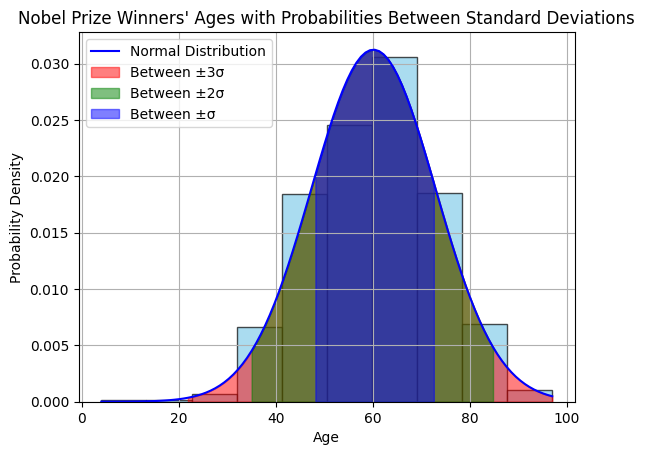

In [ ]:
# Calculate mean and standard deviation of the standardized ages
mu = np.mean(ages)
sigma = np.std(ages)

# Plot histogram
plt.hist(ages, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Create an array of values within three standard deviations from the mean
x = np.linspace(min(ages), max(ages), 100)

# Calculate the probability density function (PDF) for the normal distribution
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.plot(x, pdf, label='Normal Distribution', color='blue')

# Fill the area between one standard deviation from the mean
plt.fill_between(x, pdf, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='r', alpha=0.5, label='Between ±3σ')

# Fill the area between two standard deviations from the mean
plt.fill_between(x, pdf, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='g', alpha=0.5, label='Between ±2σ')

# Fill the area between one standard deviation from the mean
plt.fill_between(x, pdf, where=(x >= mu - sigma) & (x <= mu + sigma), color='b', alpha=0.5, label='Between ±σ')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Nobel Prize Winners\' Ages with Probabilities Between Standard Deviations')

plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Standard Normal Distribution
Normally distributed data can be transformed into a standard normal distribution.

The standard normal distribution is used for:

- Calculating confidence intervals
- Hypothesis tests

#### Z-Values
Z-values express how many standard deviations from the mean a value is.

The formula for calculating a Z-value is:

$( z = \frac{x - \mu}{\sigma} )$

Where: 

- $( \mu )$ is the mean.
- $( \sigma )$ is the standard deviation

Here is a graph of the standard normal distribution with probability values between the standard deviations:

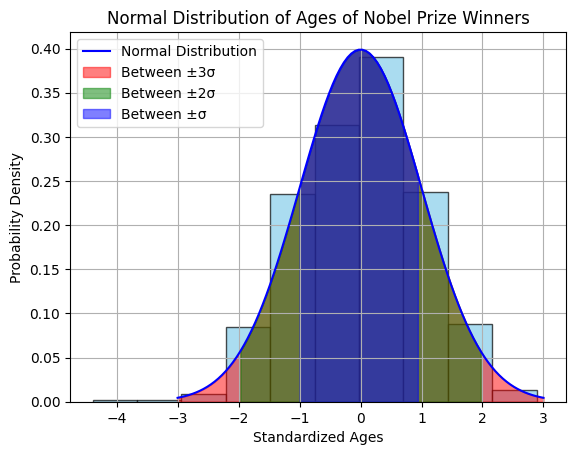

In [ ]:
# Standardize ages
standardized_ages = (ages - np.mean(ages)) / np.std(ages)

# Calculate mean and standard deviation of the standardized ages
mu = np.mean(standardized_ages)
sigma = np.std(standardized_ages)

# Plot histogram
plt.hist(standardized_ages, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Create an array of values within three standard deviations from the mean
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calculate the probability density function (PDF) for the normal distribution
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.plot(x, pdf, label='Normal Distribution', color='blue')

# Fill the area between three standard deviation from the mean
plt.fill_between(x, pdf, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='r', alpha=0.5, label='Between ±3σ')

# Fill the area between two standard deviations from the mean
plt.fill_between(x, pdf, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='g', alpha=0.5, label='Between ±2σ')

# Fill the area between one standard deviation from the mean
plt.fill_between(x, pdf, where=(x >= mu - sigma) & (x <= mu + sigma), color='b', alpha=0.5, label='Between ±σ')

# Add labels and legend
plt.title('Normal Distribution of Ages of Nobel Prize Winners')
plt.xlabel('Standardized Ages')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

#### The Probability Density Function (PDF)
The Probability Density Function (PDF) of a normal distribution represents the relative likelihood of observing different values of a continuous random variable. For a normal distribution with mean $( \mu )$ and standard deviation $( \sigma )$, the PDF is denoted as $( f(x) )$.

The formula for the standard normal PDF $( \phi(z) )$ is:

$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}$

Where:
- $( z )$ is the standardized value of the random variable $( X )$, calculated as $( z = \frac{x - \mu}{\sigma} )$.
- $( e )$ is the base of the natural logarithm.
- $( \pi )$ is the mathematical constant pi (approximately 3.14159).

If your data is not standardized (i.e., does not have a mean of 0 and standard deviation of 1), you would first standardize the values using the formula $( z = \frac{x - \mu}{\sigma} )$ before evaluating the PDF.

#### The Cummulative Distribution Function
The CDF represents the probability that a random variable $( X )$ is less than or equal to a given value $( x )$. For a normal distribution with mean $( \mu )$ and standard deviation $( \sigma )$, the CDF is denoted as $( \Phi(x) )$.

The formula for the standard normal cumulative distribution function $( \Phi(z) )$ is:

$\Phi(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-\frac{1}{2}t^2} dt $

Where:
- $( z )$ is the standardized value of the random variable $( X )$, calculated as $( z = \frac{x - \mu}{\sigma} )$.
- $( e )$ is the base of the natural logarithm.
- $( \pi )$ is the mathematical constant pi (approximately 3.14159).

To calculate the probability of a specific range of values, you can subtract the CDF at the lower bound of the range from the CDF at the upper bound of the range:

$P(a \leq X \leq b) = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right) $

Where $( a )$ and $( b )$ are the lower and upper bounds of the range, respectively.

For a normal distribution with a mean $( \mu )$ and standard deviation $( \sigma )$, you can use the above formula to calculate probabilities associated with specific values or ranges of values. If your data is not standardized (i.e., does not have a mean of 0 and standard deviation of 1), you would first standardize the values using the formula $( z = \frac{x - \mu}{\sigma} )$ before using the standard normal CDF.

#### Finding the P-value of a Z-Value

In [ ]:
mean = ages.mean()
standard_deviation = ages.std()

pdf2 = stats.norm(loc=mean, scale=standard_deviation)
p_value = pdf2.cdf(40)

print('p-value:', p_value)

p-value: 0.05756104393909259


#### Finding the Z-value of a P-Value

In [ ]:
mean = ages.mean()
standard_deviation = ages.std()

pdf2 = stats.norm(loc=mean, scale=standard_deviation)
z_val = pdf2.ppf(0.05756104393909259)

print('z-value:', z_val)

z-value: 40.0


## Hypothesis Testing and p-values
Hypothesis testing is a statistical method used to make inferences about a population based on sample data. It involves testing a hypothesis or claim about a population parameter, such as a mean or proportion.

1. **Null and Alternative Hypotheses**:
   - Null Hypothesis (H0): It is a statement of no effect or no difference, typically denoted as the status quo.
   - Alternative Hypothesis (H1 or Ha): It is the hypothesis that we are trying to support, indicating there is an effect or difference.

 Example: Null hypothesis - mean of age is equal to 40

 Alternative hypothesis - mean of age is not equal to 40

 H0: μ = 40, Ha: μ ≠ 40

2. **Types of Errors: Type I and Type II**:
   - Type I Error (False Positive): It occurs when we reject the null hypothesis when it is actually true.
   - Type II Error (False Negative): It occurs when we fail to reject the null hypothesis when it is actually false.

 Example: Type I error - Rejecting the null hypothesis when the population mean is actually equal to 40

 Type II error - Failing to reject the null hypothesis when the population mean is actually not equal to 40


3. **Significance Level (α)**:
   - Significance level is denoted by α and represents the probability of making a Type I error.
   - Commonly used significance levels include 0.05, 0.01, etc.

4. **p-values and their interpretation**:
   - p-value is the probability of observing the data or more extreme data under the null hypothesis.
   - If p-value is less than α, we reject the null hypothesis; otherwise, we fail to reject it.

In [ ]:
t_statistic, p_value = stats.ttest_1samp(ages, 40)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 48.69033819659244
p-value: 5.42663134957101e-261




5. **One-sample and Two-sample t-tests**:
   - One-sample t-test is used to compare the mean of a single sample to a known value or population mean.
   - Two-sample t-test is used to compare the means of two independent samples.


In [ ]:
group1, group2 = np.array_split(ages, 2)

t_statistic, p_value = stats.ttest_ind(group1, group2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.4459199913013356
p-value: 0.14852807347682806


6. **Z-tests and Confidence Intervals**:
   - Z-tests are similar to t-tests but are used when sample size is large and population standard deviation is known.
   - Confidence Intervals provide a range of values that is likely to contain the population parameter with a certain level of confidence.


- A z-test a statistical test used to determine whether two means are different when the population standard deviation is known

In [ ]:
def ztest(sample_data=None, population_data=None, sample_mean:float=None, population_mean:float=None):
    if sample_data.all():
        sample_mean = np.mean(sample_ages)
        sample_size = len(sample_ages)
    if population_data.all():
        population_mean = np.mean(ages)
        population_std = np.std(ages)
        
    z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))
    p_value = stats.norm.cdf(z_score)
    return (z_score, p_value)

In [ ]:
sample_ages = np.array(data.sample(n=56)['age'])

In [ ]:
z_score, p_value = ztest(sample_ages, ages)

In [ ]:
p_value = stats.norm.cdf(z_score)

In [ ]:
p_value

0.6737098436973401

In [ ]:
sample_mean = np.mean(ages)
sample_std = np.std(ages)

n = len(ages)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print('z critical:', z_critical)
print("Confidence Interval:", confidence_interval)

z critical: 1.959963984540054
Confidence Interval: (59.314817066181526, 60.934136908713874)


In [ ]:
(1.959963984540054 * sample_std) + sample_mean

85.15855423882927


7. **Chi-square Tests for Independence**:
   - Chi-square test is used to determine whether there is a significant association between two categorical variables.


In [ ]:
# Pick out on the Gender and Category from the dataset
# We drop all the missing values just for demonstration purposes
gender_category_data = data[['Gender', 'Category']].dropna()

In [ ]:
# Obtain the cross tabulation of Gender and Category
# The cross tabulation is also known as the contingency table
gender_category_tab = pd.crosstab(gender_category_data.Gender, gender_category_data.Category)

In [ ]:
# Example: Performing a chi-square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(gender_category_tab)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square Statistic: 55.9451562721685
p-value: 2.1020428793080495e-08



8. **ANOVA (Analysis of Variance) and its applications**:
   - ANOVA is used to compare means of three or more groups to determine if there is a statistically significant difference between them.

In [ ]:
# Example: Performing ANOVA
group1, group2, group3 = np.array_split(ages, 3) 
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.26064539756513505
p-value: 0.7706090235692291


The p-value of 0.770... is way higher than the significance level (0.05), and therefore we fail to reject the null hypothesis (ie. The means are statistically the same)

F-statistic tells us whether there are significant differences between the means of the groups

f_statistic = between_group_variance/within_group_variance

These code snippets demonstrate various hypothesis testing techniques and their implementation in Python using libraries like SciPy.

## Key terms associated with statistical inference:

1. **Population**: The entire group of individuals or elements that the researcher is interested in studying. It's often impractical or impossible to collect data from the entire population, so we work with samples instead.

2. **Sample**: A subset of the population from which data is collected. The sample should ideally be representative of the population to make valid inferences.

3. **Parameter**: A numerical characteristic of a population. Examples include the population mean, population proportion, or population standard deviation.

4. **Statistic**: A numerical characteristic of a sample. Examples include the sample mean, sample proportion, or sample standard deviation.

5. **Estimation**: The process of using sample data to estimate the value of a population parameter. Point estimation involves providing a single value as an estimate, while interval estimation provides a range of values (confidence interval) within which the parameter is believed to lie.

6. **Hypothesis Testing**: A method used to make decisions or draw conclusions about a population parameter based on sample data. It involves stating a null hypothesis (H0) and an alternative hypothesis (H1), collecting data, and then using statistical tests to determine whether there is enough evidence to reject the null hypothesis.

7. **Confidence Intervals**: A range of values calculated from sample data that is likely to contain the true population parameter with a certain level of confidence (e.g., 95% confidence interval).

8. **Significance Level (α)**: The probability of rejecting the null hypothesis when it is actually true. It is typically set at 0.05 or 0.01, indicating a 5% or 1% chance of a Type I error, respectively.

9. **Type I Error**: Rejecting the null hypothesis when it is actually true (false positive).

10. **Type II Error**: Failing to reject the null hypothesis when it is actually false (false negative).